#  <center><u>LINEAR REGRESSION<u><center>

<p style='text-align: right;'> Total points =51</p>


###  Linear Regression


Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.


Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. It is the simplest form of Linear Regression where we fit a straight line to the data.



Read this blog too in incognito mode: https://towardsdatascience.com/understanding-the-fundamentals-of-linear-regression-7e64afd614e1#:~:text=What%20is%20Linear%20Regression%3F,represented%20with%20a%20straight%20line.

## Simple Linear Regression - Model Assumptions

The Linear Regression Model is based on several assumptions which are listed below:-

i.	Linear relationship
ii.	Multivariate normality
iii.	No or little multicollinearity
iv.	No auto-correlation
v.	Homoscedasticity


### i.	Linear relationship


The relationship between response and feature variables should be linear. This linear relationship assumption can be tested by plotting a scatter-plot between response and feature variables.


### ii.	Multivariate normality

The linear regression model requires all variables to be multivariate normal. A multivariate normal distribution means a vector in multiple normally distributed variables, where any linear combination of the variables is also normally distributed.


### iii.	No or little multicollinearity

It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are highly correlated.


### iv.	No auto-correlation

Also, it is assumed that there is little or no auto-correlation in the data. Autocorrelation occurs when the residual errors are not independent from each other.


### v.	Homoscedasticity

Homoscedasticity describes a situation in which the error term (that is, the noise in the model) is the same across all values of the independent variables. It means the residuals are same across the regression line. It can be checked by looking at scatter plot.


### **`Reference video below for assumptions in linear regression`**

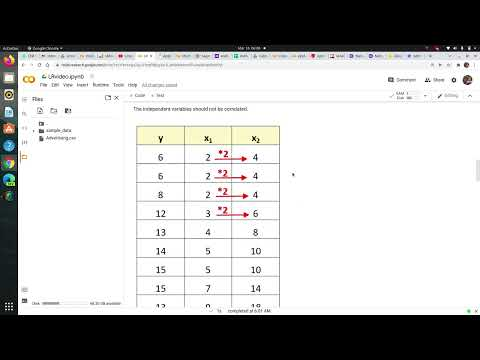

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Q01twH5Lqwo',width=700, height=400)

###  Simple Linear Regression (SLR)

Simple Linear Regression (or SLR) is the simplest model in machine learning. It models the linear relationship between the independent and dependent variables. 

This assignment is based on the TV and Sales data .
There is one independent or input variable which represents the TV data and is denoted by X. Similarly, there is one dependent or output variable which represents the Sales and is denoted by y. We want to build a linear relationship between these variables. This linear relationship can be modelled by mathematical equation of the form:-
				 
                 
                 Y = β0   + β1*X    -------------   (1)
                 

In this equation, X and Y are called independent and dependent variables respectively,

β1 is the coefficient for independent variable and

β0 is the constant term.

β0 and β1 are called parameters of the model.
 


For simplicity, we can compare the above equation with the basic line equation of the form:-
 
                   y = ax + b       ----------------- (2)

We can see that 

slope of the line is given by, a =  β1,  and

intercept of the line by b =  β0. 


In this Simple Linear Regression model, we want to fit a line which estimates the linear relationship between X and Y. So, the question of fitting reduces to estimating the parameters of the model β0 and β1. 

 

## Ordinary Least Square Method

The TV and Sales data are given by X and y respectively. We can draw a scatter plot between X and y which shows the relationship between them.

 

Now, our task is to find a line which best fits this scatter plot. This line will help us to predict the value of any Target variable for any given Feature variable. This line is called **Regression line**. 


We can define an error function for any line. Then, the regression line is the one which minimizes the error function. Such an error function is also called a **Cost function**. 

By below chart you might understand more clearly

![image.png](attachment:image.png)



##Problem Statement
Build a model which predicts sales based on the money spent on different platforms for marketing.

Understanding the Data
Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

<p style='text-align: right;'> 2*2=4 points</p>


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import necessary libraries numpy as np, pandas as pd, pyplot as plt
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# The above command sets the backend of matplotlib to the 'inline' backend. 
# It means the output of plotting commands is displayed inline.

<p style='text-align: right;'> 2*6 = 12 points</p>


## About the dataset

Let's import data from the following url:-

https://www.kaggle.com/ashydv/advertising-dataset








Data Dict:<br>
There are 3 Input Variables and 1 Output Variable (Sales).<br>
The data type of all the input variables is float64. The data type of out variable (Sales) is float64.<br>

In [13]:
# Import the data

df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


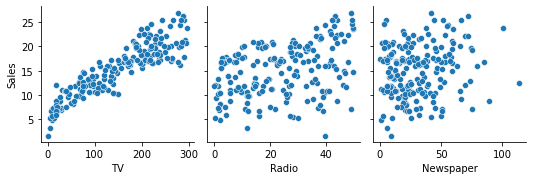

In [14]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

- No Strong Linear Relationship between Radio with Sales and Newspapaer with Sales
- TV and Sales shows strong positive linear relationship

In [15]:
#drop radio and newspaper column
df.drop(['Radio','Newspaper'],axis=1,inplace=True)
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


### pandas shape attribute

The shape attribute of the pandas dataframe gives the dimensions of the dataframe.

In [16]:
# View the dimensions of df
df.shape

(200, 2)

### pandas head() method


In [17]:
# View the top 5 rows of df
print(df.head())

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2   12.0
3  151.5   16.5
4  180.8   17.9


### pandas info() method

In [19]:
# View dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


### pandas describe() method

In [20]:
# View descriptive statistics
print(df.describe())

               TV       Sales
count  200.000000  200.000000
mean   147.042500   15.130500
std     85.854236    5.283892
min      0.700000    1.600000
25%     74.375000   11.000000
50%    149.750000   16.000000
75%    218.825000   19.050000
max    296.400000   27.000000


## Independent and Dependent Variables


### Independent variable

Independent variable is also called Input variable and is denoted by X. In practical applications, independent variable is also called Feature variable or Predictor variable. We can denote it as:-

Independent or Input variable (X) = Feature variable = Predictor variable 


### Dependent variable

Dependent variable is also called Output variable and is denoted by y. 

Dependent variable is also called Target variable or Response variable. It can be denoted it as follows:-

Dependent or Output variable (y) = Target variable = Response variable


### **`Reference video below for splitting and describing dataframe`**

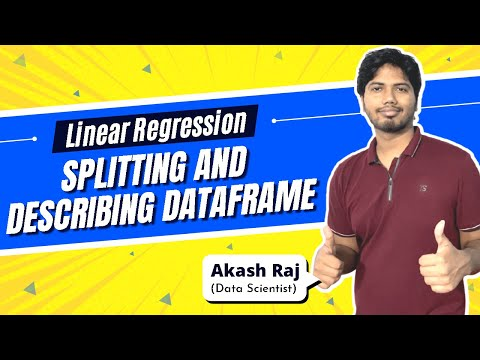

In [21]:
YouTubeVideo('XZLQwZ0hs0A',width=700, height=400)

<p style='text-align: right;'> 2 points</p>


In [22]:
# Declare feature variable and target variable
# TV and Sales data values are given by X and y respectively.
# Values attribute of pandas dataframe returns the numpy arrays.

X = df['TV']

y = df['Sales']

X.shape,y.shape

((200,), (200,))

## Visual exploratory data analysis

Visualize the relationship between X and y by plotting a scatterplot between X and y.


### **`Reference video below for EDA`**

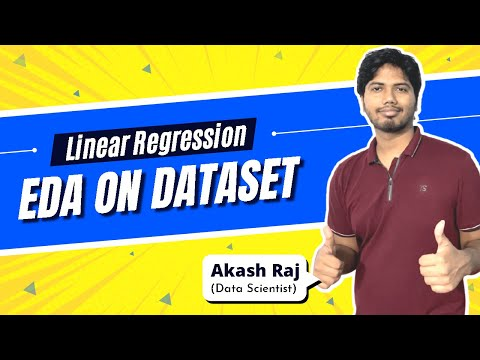

In [23]:
YouTubeVideo('WvbLLNZyvrM',width=700, height=400)

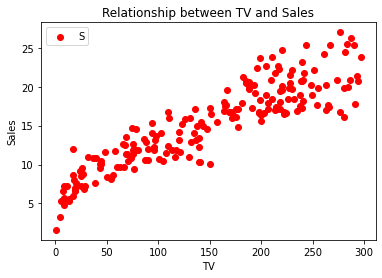

In [32]:
# Plot scatter plot between X and y
plt.scatter(X,y,color='red')
plt.title('Relationship between TV and Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend('Scatter Plot')
plt.show()

<p style='text-align: right;'> 2 points</p>


Hey buddy! did you notice ? the above graph shows some sort of relationship between sales and TV. Don't you think this shows positive linear relation? i.e when As TV's value increases sales increases ans same is vise-versa.

# Visualising Data Using Seaborn


### **`Reference video below for pairplot and reshaping`**



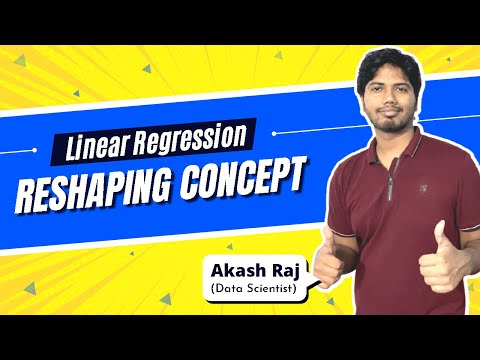

In [33]:
YouTubeVideo('2un1b7EEBwc',width=700, height=400)

<p style='text-align: right;'> 2*2=4 points</p>


In [34]:
# import seaborn with alias sns
import seaborn as sns
# import %matplotlib inline to visualise in the notebook
%matplotlib inline

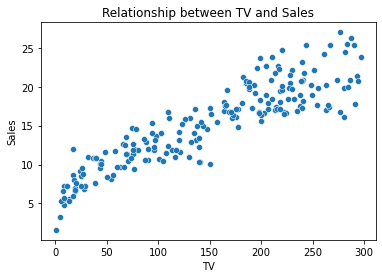

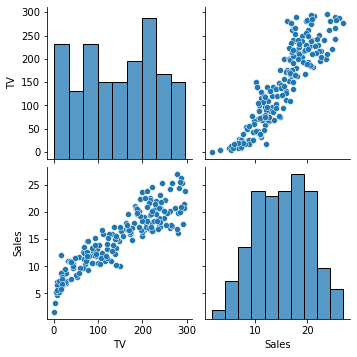

In [38]:
# Visualise the relationship between the features and the response using scatterplots

sns.scatterplot(X,y)
plt.title('Relationship between TV and Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

# plot a pairplot also for df

sns.pairplot(df,x_vars=['TV','Sales'],y_vars=['TV','Sales'])
plt.show()

Ohoo! We can see very well that you have done good practice of Visualisation in your EDA assignment. Anyways the above graph also shows positive linear relation between both TV and Sales.

## Checking dimensions of X and y

We need to check the dimensions of X and y to make sure they are in right format for Scikit-Learn API. 


<p style='text-align: right;'> 2points</p>


In [39]:
/# Print the dimensions of X and y
print('Dimension of X: ',X.shape)
print('Dimension of y: ',y.shape)

Dimension of X:  (200,)
Dimension of y:  (200,)


## Reshaping X and y

Since we are working with only one feature variable, so we need to reshape using Numpy reshape() method.

E.g, If you have an array of shape (3,2) then reshaping it with (-1, 1), then the array will get reshaped in such a way that the resulting array has only 1 column and this is only possible by having 6 rows, hence, (6,1)

You have seen the above example. Now you smarty! try reshaping on your data.

<p style='text-align: right;'> 2*2 = 4 points</p>


In [41]:
# Reshape X and y

X = X.values.reshape(-1,1)

y = y.values.reshape(-1,1)

In [42]:
# Print the dimensions of X and y after reshaping
print('New Dimension of X: ',X.shape)
print('New Dimension of y: ',y.shape)

New Dimension of X:  (200, 1)
New Dimension of y:  (200, 1)


Cool right!

## Difference in dimensions of X and y after reshaping


Hey! You can see the difference in diminsions of X and y before and after reshaping.

It is essential in this case because getting the feature and target variable right is an important precursor to model building.

# Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.


### **`Reference video below for regression model`**

---





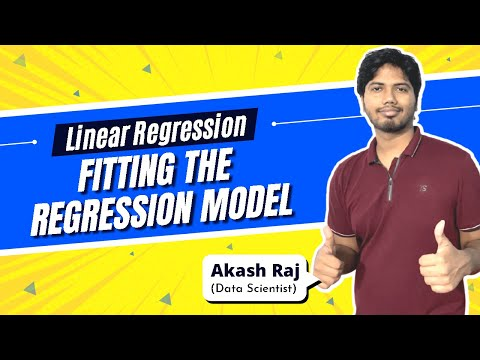

In [43]:
YouTubeVideo('Jx_I4GLXLys',width=700, height=400)

## Mechanics of the model

Hey! before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows: 

Split the dataset into two sets – the training set and the test set. Then, instantiate the regressor lm and fit it on the training set with the fit method. 

In this step, the model learned the relationships between the training data (X_train, y_train). 

Oh Yeah! Now the model is ready to make predictions on the test data (X_test). Hence, predict on the test data using the predict method. 


The steps are as follow:

## Train test split


Split the dataset into two sets namely - train set and test set.

The model learn the relationships from the training data and predict on test data.


Hey Smarty!! It's absolutely fine if you didn't understand the theory well! We are here to help you make comfortable with all the concepts slowly as we proceeds towards our upcoming assignments.

No fear when AI_4_All is here :)

<p style='text-align: right;'> 2+2+3=7 points</p>


In [44]:
# import train test split
import sklearn
from sklearn.model_selection import train_test_split

# Split X and y into training and test data sets
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [45]:
# print shapes of X_train,y_train, X_test, y_test
print('Shapes of X_train: ',X_train.shape)
print('Shapes of y_train: ',y_train.shape)
print('Shapes of X_test: ',X_test.shape)
print('Shapes of y_test: ',y_test.shape)

Shapes of X_train:  (140, 1)
Shapes of y_train:  (140, 1)
Shapes of X_test:  (60, 1)
Shapes of y_test:  (60, 1)


In [47]:
import statsmodels
import statsmodels.api as sm

In [48]:
# Fit the linear model
# Instantiate the linear regression object lm
# Train the model using training data sets

X_train_sm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_sm).fit()

In [49]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           1.52e-52
Time:                        18:01:08   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [50]:
# Predict on the test data
X_test_sm = sm.add_constant(X_test)
y_pred = lm.predict(X_test_sm)

## Model slope and intercept term

The model slope is given by lm.coef_ and model intercept term is given by lm.intercept_. 

for example. if the estimated model slope and intercept values are 1.60509347 and  -11.16003616.

So, the equation of the fitted regression line will be:-

y = 1.60509347 * x - 11.16003616  



In [60]:
lm.params

array([6.9486832 , 0.05454575])

<p style='text-align: right;'> 2 points</p>


In [61]:
# Compute model slope and intercept
a = lm.params[1]
b = lm.params[0]

# also print a and b
print('Estimated model slope, a: ',a)
print('Estimated model intercept, b: ',b)

Estimated model slope, a:  0.05454575291590792
Estimated model intercept, b:  6.9486832000013585


In [62]:
# So comment below, our fitted regression line here is ?
# calculated--> #y = 0.05454575291590792*X + 6.9486832000013585
# clodyml given --> #y=0.05483488 * x + 7.20655455
# That is our linear model.

#### **TEST DATASET**
**(Best Fit Regression Line)**

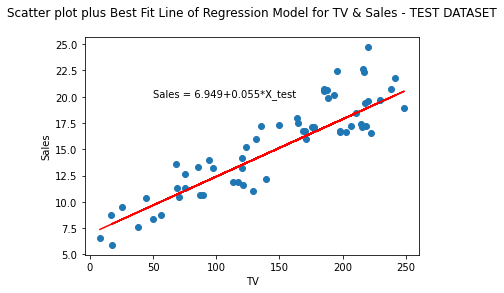

In [105]:
plt.scatter(X_test,y_test)
plt.plot(X_test,(0.05454575291590792*X_test + 6.9486832000013585),'r')
label = f'Sales = {round(lm.params[0],3)}+{round(lm.params[1],3)}*X_test'
plt.annotate(label,(50,20))
plt.title('Scatter plot plus Best Fit Line of Regression Model for TV & Sales - TEST DATASET\n')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.show()

Wohoo! Awesome job done! 

## Making predictions


To make prediction, on an individual TV value, 


		lm.predict(Xi)
        

where Xi is the TV data value of the ith observation.



In [78]:
Xi = df['TV'][:5]
Xi

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [80]:
Xi.shape

(5,)

In [81]:
Xi = Xi.values.reshape(-1,1)
Xi.shape

(5, 1)

In [82]:
Xi = sm.add_constant(Xi)

<p style='text-align: right;'> 2 points</p>


In [85]:
# Predicting Sales values on first five 5 TV  datasets only
lm.predict(Xi)

array([19.49966095,  9.3759692 ,  7.88687015, 15.21236477, 16.81055533])

We know that you can also do prediction for all values of TV available in our dataset

Can you show it now?



In [87]:
x  = df['TV']
x = x.values.reshape(-1,1)
x = sm.add_constant(x)
x.shape

(200, 2)

In [88]:
# prediction for all X present in the dataset
lm.predict(x)

array([19.49966095,  9.3759692 ,  7.88687015, 15.21236477, 16.81055533,
        7.42323125, 10.08506399, 13.5050827 ,  7.41777668, 17.84692463,
       10.55415747, 18.65965635,  8.24687212, 12.26689411, 18.08147137,
       17.60692332, 10.64688525, 22.29785807, 10.7232493 , 14.9832726 ,
       18.86147564, 19.89784494,  7.66868714, 19.40147859, 10.34688361,
       21.28876164, 14.74327129, 20.04511848, 20.51966653, 10.79961336,
       22.92513423, 13.1068987 , 12.25053038, 21.43603517, 12.16871175,
       22.80513357, 21.50694465, 11.02325094,  9.29960515, 19.38511486,
       17.99419817, 16.60328147, 22.96331626, 18.23419948,  8.3177816 ,
       16.49964454, 11.84143724, 20.03420932, 19.34147826, 10.59779407,
       17.84692463, 12.42507679, 18.75238413, 16.90873768, 21.27785249,
       17.79783345,  7.3468672 , 14.37781475, 18.44692791, 18.44147334,
        9.86688098, 21.20148844, 20.00148187, 12.55053202, 14.09963141,
       10.71234015,  8.66687442, 14.54690658, 19.89784494, 18.77

## Regression metrics for model performance


Now, it is the time to evaluate model performance. 

For regression problems, there are two ways to compute the model performance. They are RMSE (Root Mean Square Error) and R-Squared Value. These are explained below:-  


### RMSE

    RMSE is the standard deviation of the residuals. So, RMSE gives us the standard deviation of the unexplained variance by the model. It can be calculated by taking square root of Mean Squared Error.
    RMSE is an absolute measure of fit. It gives us how spread the residuals are, given by the standard deviation of the residuals. The more concentrated the data is around the regression line, the lower the residuals and hence lower the standard deviation of residuals. It results in lower values of RMSE. So, lower values of RMSE indicate better fit of data. 

Formula:
![image.png](attachment:image.png)



### R-Squared

    (R2) Correlation explains the strength of the relationship between an independent and dependent variable,whereas R-square explains to what extent the variance of one variable explains the variance of the second variable. Hence It may also be known as the coefficient of determination.
    So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.
    In general, the higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can become negative if our model is wrong.

Fomula:

![image.png](attachment:image.png)

<p style='text-align: right;'> 2*2 = 4 points</p>




Read this blog for metrics in regression: https://machinelearningmastery.com/regression-metrics-for-machine-learning/

### **`Reference video below for metrics`**

---





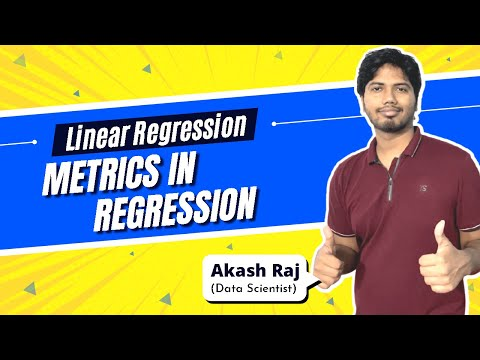

In [89]:
YouTubeVideo('PnOyLeekPVE',width=700, height=400)

In [90]:
from sklearn.metrics import r2_score, mean_squared_error

**Train Dataset - Metrics**

In [94]:
y_train_pred = lm.predict(X_train_sm)

In [95]:
# Calculate and print Root Mean Square Error(RMSE)
print('Train - RMSE value: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

Train - RMSE value:  2.3984162246129914


In [96]:
# Calculate and print r2_score
print('Train - R2 Score value: ',r2_score(y_train,y_train_pred))

Train - R2 Score value:  0.8157933136480389


**Test Dataset - Metrics**

In [97]:
# Calculate and print Root Mean Square Error(RMSE)
print('Test - RMSE value: ',np.sqrt(mean_squared_error(y_test,y_pred)))

Test - RMSE value:  2.019296008966233


In [98]:
# Calculate and print r2_score
print('Test - R2 Score value: ',r2_score(y_test,y_pred))

Test - R2 Score value:  0.7921031601245658


## Interpretation and Conclusion


The RMSE value has been found to be  2.2759. It means the standard deviation for our prediction is  2.2759. which is quite less. Sometimes we can also expect the RMSE to be less than  2.2759. So, the model is good fit to the data. 


In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy. Our R2 score value has been found to be  0.8149. It means that this model explains  81.49 % of the variance in our dependent variable. So, the R2 score value confirms that the model is good enough to deploy because it provides good fit to the data.

Wohoo! Really good job done!

In [100]:
lm.params

array([6.9486832 , 0.05454575])

**Train Dataset**

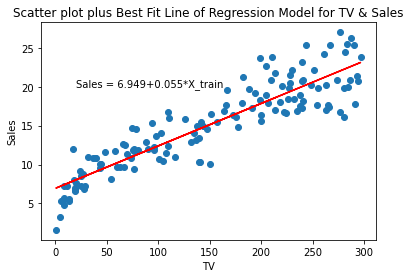

In [104]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.9486832+0.05454575*X_train,color='red')
label = f'Sales = {round(lm.params[0],3)}+{round(lm.params[1],3)}*X_train'
plt.annotate(label,(20,20))
plt.title('Scatter plot plus Best Fit Line of Regression Model for TV & Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

**Test Dataset**

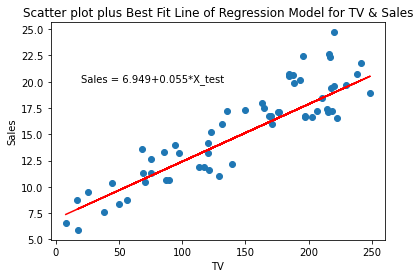

In [106]:
plt.scatter(X_test,y_test)
plt.plot(X_test,6.9486832+0.05454575*X_test,color='red')
label = f'Sales = {round(lm.params[0],3)}+{round(lm.params[1],3)}*X_test'
plt.annotate(label,(20,20))
plt.title('Scatter plot plus Best Fit Line of Regression Model for TV & Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

<p style='text-align: right;'> 2 points</p>


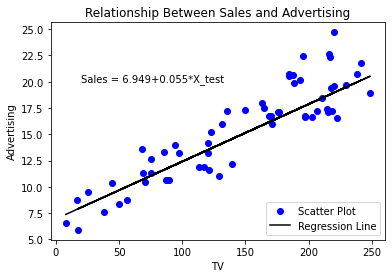

In [118]:
# Plot the Regression Line between X and Y as shown in below output.
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,6.9486832+0.05454575*X_test,color='black')
label = f'Sales = {round(lm.params[0],3)}+{round(lm.params[1],3)}*X_test'
plt.annotate(label,(20,20))
plt.legend(['Scatter Plot','Regression Line'], loc ="lower right")
plt.title('Relationship Between Sales and Advertising')
plt.xlabel('TV')
plt.ylabel('Advertising')
plt.show()

As you can see above, the regression line fits the data quite well. Wow!

## Residual analysis



A linear regression model may not represent the data appropriately. The model may be a poor fit to the data. So, we should validate our model by defining and examining residual plots.

The difference between the observed value of the dependent variable (y) and the predicted value (ŷi) is called the residual and is denoted by e or error. The scatter-plot of these residuals is called residual plot.

If the data points in a residual plot are randomly dispersed around horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise a non-linear model may be more appropriate.

If we take a look at the generated ‘Residual errors’ plot, we can clearly see that the train data plot pattern is non-random. Same is the case with the test data plot pattern.
So, it suggests a better-fit for a non-linear model. 




Check this blog for residual analysis: https://towardsdatascience.com/how-to-use-residual-plots-for-regression-model-validation-c3c70e8ab378#:~:text=Residuals,and%20the%20observed%20actual%20value.

### **`Reference video below for residual errors`**


---





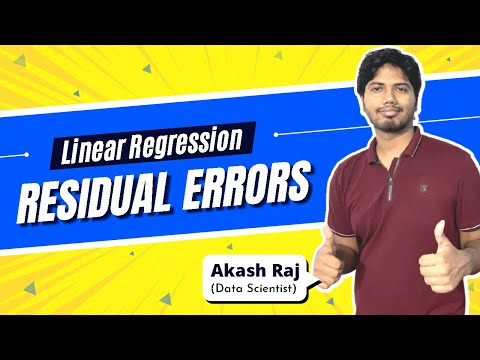

In [119]:
YouTubeVideo('OrWCtouG5jo',width=700, height=400)

In [127]:
x = df['TV']
y = df['Sales']
np.random.seed(0)
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=100)
x_train_sm = sm.add_constant(x_train)
lm = sm.OLS(y_train,x_train_sm).fit()
y_train_pred = lm.predict(x_train_sm)
x_test_sm = sm.add_constant(x_test)
y_test_pred = lm.predict(x_test_sm)
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

In [129]:
x_train.shape,train_residuals.shape

((140,), (140,))

In [151]:
x_test.shape,test_residuals.shape

((60,), (60,))

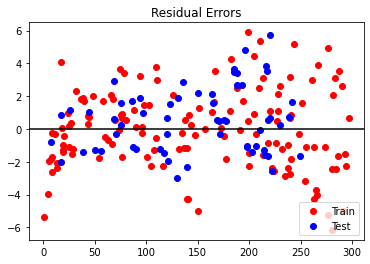

In [159]:
# Plotting residual errors
plt.figure(figsize=(6,4))
plt.scatter(x_train,train_residuals,color='red')
plt.scatter(x_test,test_residuals,color='blue')
plt.axhline(y=np.nanmean(train_residuals),color='black')
plt.title('Residual Errors')
plt.legend(['Train','Test'],loc='lower right')
plt.show()

## Checking for Overfitting and Underfitting


We will see training set score and test set score.

You can excpect the training set score to be 0.7996, which is averagely good. So, the model learned the relationships quite appropriately from the training data. Thus, the model performs good on the test data as test score will be  0.8149. It is a clear sign of good fit/ balanced fit. Hence, we can validated our finding that the linear regression model provides good fit to the data. 


**Underfitting**: Your model is underfitting the training data when the model performs poorly on the training data. This is because the model is unable to capture the relationship between the input examples (often called X) and the target values (often called Y). 

**Overfitting**: Your model is overfitting your training data when you see that the model performs well on the training data but does not perform well on the evaluation data. This is because the model is memorizing the data it has seen and is unable to generalize to unseen examples.

You see the difference visually as below:

![image.png](attachment:image.png)


<p style='text-align: right;'> 2 points</p>


In [166]:
# Checking for Overfitting or Underfitting the data by calculation score using score function.
x = df['TV']
y = df['Sales']
np.random.seed(0)
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(x,y,train_size=0.7,random_state=100)
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fit the model using lr.fit()
model.fit(X_train_lm, y_train_lm)

y_train_pred_lm = model.predict(X_train_lm)
y_test_pred_lm = model.predict(X_test_lm)

print('Training set score: ',round(model.score(X_train_lm,y_train_lm),3))
print('Test set score: ',round(model.score(X_test_lm,y_test_lm),3))

Training set score:  0.816
Test set score:  0.792


# **`Summary`**

- We learnt assumptions required for linear regression model.
- We built linear regression model using sklearn and also got the basic idea of overfitting and underfitting.
- We also did residual analysis to cross check one of the linear regression assumption. 

#  Congratulations on building your first machine learning model! Smile please! :)


# FeedBack
We hope you’ve enjoyed this course so far. We’re committed to helping you use AIforAll course to
its full potential so you can grow with us. And that’s why we need your help in form of a feedback
here

We appreciate your time for your thoughtful comment here

https://forms.gle/AGReqrmyeJ6bFcCf7